In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import Image

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [5]:
data_src="Dataset/"

In [6]:
data=[]
y=[]
for d in os.listdir(data_src):
    for file in os.listdir(data_src+d):
        data.append(Image.open(data_src+d+'/'+file))
        y.append(d)

In [7]:
X=[]
for im in data:
    X.append(np.array(im))

In [8]:
X=np.array(X)

In [9]:
X.shape

(6400, 128, 128)

In [10]:
X=X/255

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical

In [13]:
non=0
mild=0
mod=0
vm=0
for cat in y:
    if cat=="Mild_Demented":
        mild+=1
    elif cat=="Moderate_Demented":
        mod+=1
    elif cat=="Non_Demented":
        non+=1
    else:
        vm+=1
print("Non Demented: ",non)
print("Very Mild: ",vm)
print("Moderate: ",mod)
print("Mild :",mild)


Non Demented:  3200
Very Mild:  2240
Moderate:  64
Mild : 896


In [14]:
y_num=[]
for cat in y:
    if cat=="Mild_Demented":
        y_num.append(2)
    elif cat=="Moderate_Demented":
        y_num.append(3)
    elif cat=="Non_Demented":
        y_num.append(0)
    else:
        y_num.append(1)

In [15]:
y=to_categorical(y_num)

In [16]:
y.shape

(6400, 4)

In [17]:
X=X.reshape(6400,128,128,1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4800, 128, 128, 1) (1600, 128, 128, 1) (4800, 4) (1600, 4)


In [20]:
cnn=Sequential()
cnn.add(Conv2D(64,(3,3),padding="same",activation='relu',input_shape=X_train.shape[1:]))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32,(3,3),padding="same",activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32,(2,2),padding="same",activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(50,activation='relu'))
cnn.add(Dense(4,activation='softmax'))

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [23]:
history=cnn.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
150/150 [==============================] - 205s 1s/step - loss: 1.0303 - accuracy: 0.5125 - val_loss: 1.0116 - val_accuracy: 0.5325
Epoch 2/100
150/150 [==============================] - 183s 1s/step - loss: 0.9020 - accuracy: 0.5788 - val_loss: 0.8734 - val_accuracy: 0.5706
Epoch 3/100
150/150 [==============================] - 182s 1s/step - loss: 0.7823 - accuracy: 0.6517 - val_loss: 0.7699 - val_accuracy: 0.6463
Epoch 4/100
150/150 [==============================] - 177s 1s/step - loss: 0.5908 - accuracy: 0.7496 - val_loss: 0.5645 - val_accuracy: 0.7694
Epoch 5/100
150/150 [==============================] - 172s 1s/step - loss: 0.3781 - accuracy: 0.8558 - val_loss: 0.3983 - val_accuracy: 0.8325
Epoch 6/100
150/150 [==============================] - 173s 1s/step - loss: 0.2003 - accuracy: 0.9235 - val_loss: 0.2394 - val_accuracy: 0.9031
Epoch 7/100
150/150 [==============================] - 178s 1s/step - loss: 0.1092 - accuracy: 0.9613 - val_loss: 0.6143 - val_accuracy:

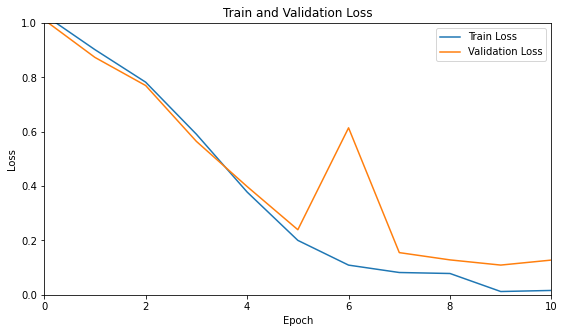

In [26]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

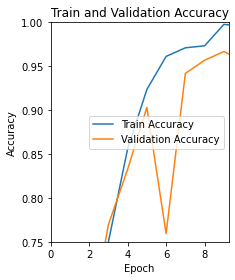

In [27]:
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [28]:
y_pred=cnn.predict(X_test)

50/50 [==============================] - 10s 177ms/step


In [29]:
y_val=[]
for y in y_pred:
    y_val.append(np.argmax(y))

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
y_true=[]
for y in y_test:
    y_true.append(np.argmax(y))

In [32]:
cm=confusion_matrix(y_true,y_val)

<AxesSubplot:>

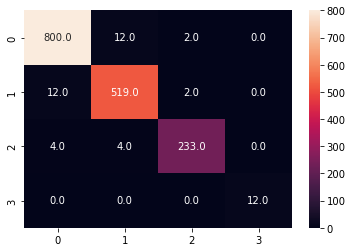

In [33]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt=".1f")

In [34]:
print(classification_report(y_true,y_val))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       814
           1       0.97      0.97      0.97       533
           2       0.98      0.97      0.97       241
           3       1.00      1.00      1.00        12

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print("Accuracy on test data: ",accuracy_score(y_true,y_val))

Accuracy on test data:  0.9775
